In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('reddit_vm.csv')

In [4]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [5]:
df.shape

(1531, 8)

In [7]:
df['title'][0]

'Health Canada approves AstraZeneca COVID-19 vaccine'

In [8]:
df['title'][1]

"COVID-19 in Canada: 'Vaccination passports' a near certainty says bio-ethicist"

In [17]:
import nltk

In [18]:
len_list = []

In [19]:
for i in range(len(df['title'])):
    len_list.append(len(df['title'][i]))
    

In [20]:
max(len_list)

298

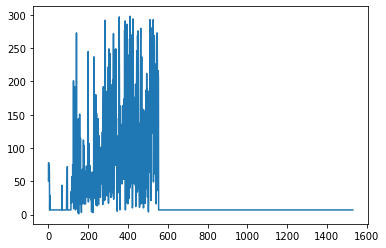

In [22]:
plt.plot(len_list)

In [25]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [26]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [27]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentence in tqdm(df['title'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 1531/1531 [00:00<00:00, 39330.19it/s]


In [28]:
preprocessed_title

['health canada approves astrazeneca covid 19 vaccine',
 'covid 19 canada vaccination passports near certainty says bio ethicist',
 'coronavirus variants could fuel canada third wave',
 'canadian government extend covid 19 emergency benefits',
 'canada pfizer extremely committed meeting vaccine delivery targets',
 'canada oxford astrazeneca vaccine approval expected week',
 'comment',
 'fuck anti vaxxing retards',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comment',
 'comm

In [30]:
import WordCloud

ModuleNotFoundError: No module named 'WordCloud'

In [31]:
!pip install WordCloud

In [32]:
import WordCloud

ModuleNotFoundError: No module named 'WordCloud'

In [33]:
from wordcloud import WordCloud

In [34]:
wordcloud = WordCloud(width = 1000, height = 1000, background_color = 'white', min_font_size = 5)

In [36]:
preprocessed_df = pd.DataFrame()

In [39]:
preprocessed_df = pd.DataFrame(preprocessed_title, columns = ['preprocessed_titles'])

In [43]:
preprocessed_df.head()

,preprocessed_titles
0,health canada approves astrazeneca covid 19 va...
1,covid 19 canada vaccination passports near cer...
2,coronavirus variants could fuel canada third wave
3,canadian government extend covid 19 emergency ...
4,canada pfizer extremely committed meeting vacc...


In [44]:
len(preprocessed_df)

1531

In [46]:
len(preprocessed_df[preprocessed_df['preprocessed_titles'] != 'comment'])

452

In [47]:
important_preprocessed_df = preprocessed_df[preprocessed_df['preprocessed_titles'] != 'comment']

In [48]:
wordcloud = WordCloud(width = 1000, height = 1000, background_color = 'white', min_font_size = 5)

In [49]:
wordcloud.generate(important_preprocessed_df)

TypeError: expected string or bytes-like object

In [50]:
import missingno as msno

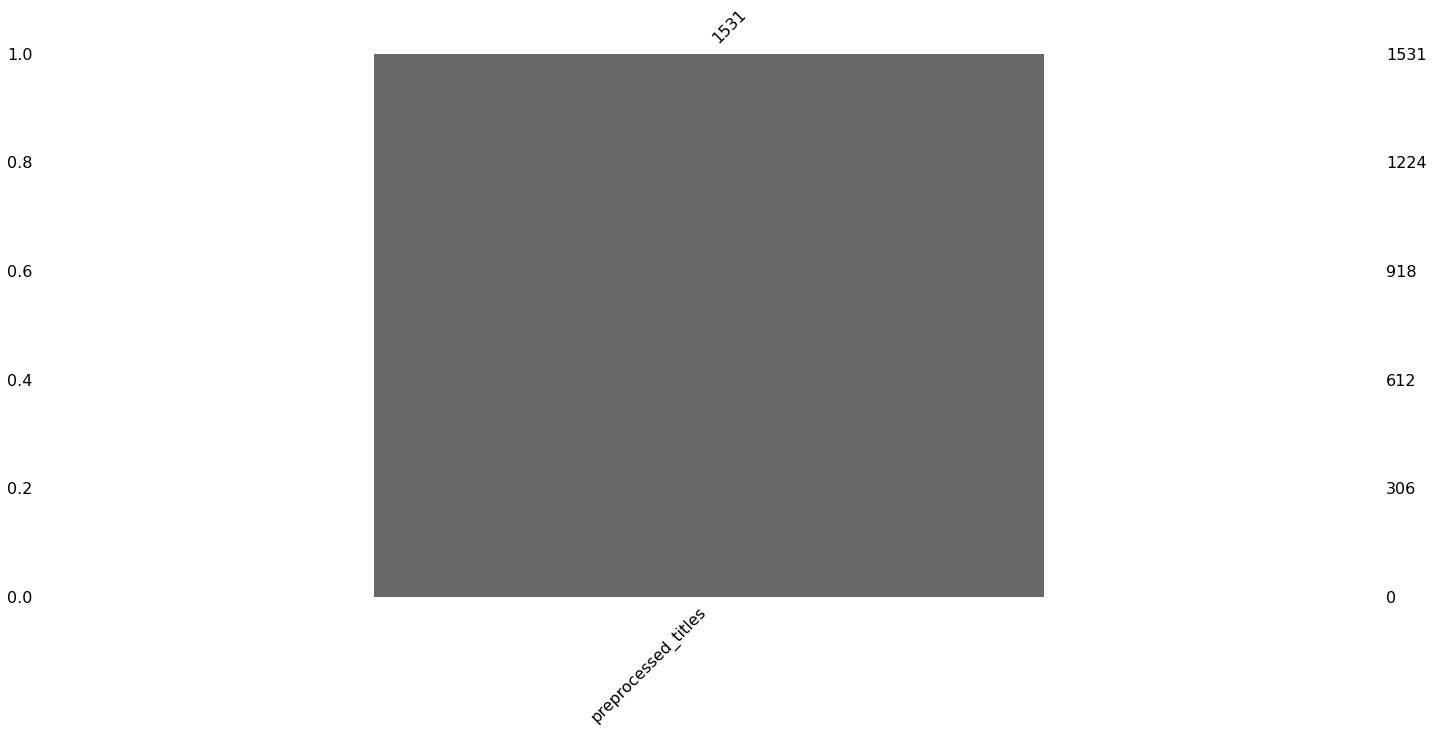

In [60]:
msno.bar(preprocessed_df)

In [61]:
type_list = []

In [62]:
for i in range(len(preprocessed_df)):
    type_list.append(type(preprocessed_df['preprocessed_titles'][0]))


In [66]:
wordcloud = WordCloud(width = 1000, height = 1000, background_color = 'white', min_font_size = 5)

In [69]:
preprocessed_df.head()

,preprocessed_titles
0,health canada approves astrazeneca covid 19 va...
1,covid 19 canada vaccination passports near cer...
2,coronavirus variants could fuel canada third wave
3,canadian government extend covid 19 emergency ...
4,canada pfizer extremely committed meeting vacc...


In [81]:
important_preprocessed_df

,preprocessed_titles
0,health canada approves astrazeneca covid 19 va...
1,covid 19 canada vaccination passports near cer...
2,coronavirus variants could fuel canada third wave
3,canadian government extend covid 19 emergency ...
4,canada pfizer extremely committed meeting vacc...
...,...
549,father five unvaccinated children unfit parent...
550,love protect never inject
551,vaccines asping trouble
552,dr harper explained presentation cervical canc...


In [82]:
wordcloud = WordCloud(width = 1000, height = 1000, background_color = 'white', min_font_size = 5)

In [89]:
def plot_cloud(wordcloud):
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud)

In [90]:
word_frequency = wordcloud.generate(''.join(important_preprocessed_df['preprocessed_titles']))

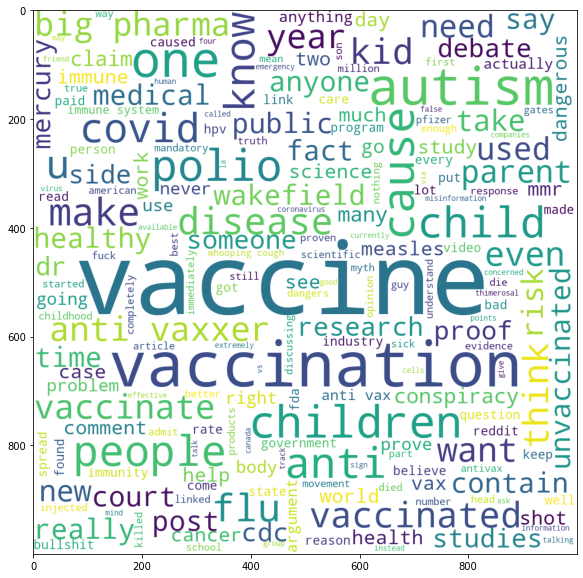

In [91]:
plot_cloud(word_frequency)

In [92]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [93]:
from datetime import datetime

In [95]:
print(datetime.now())

2021-05-19 19:45:25.883010


In [97]:
df['body'][1526]

'Was it misguided back then? Since everyone got measles and it is more serious for people over 20, it made sense to get it on purpose when you were younger, so that you would be immune and not get it when you were older (same with chickenpox, but that is more serious if over 12)\n\nHowever, nowadays we have a weakened virus (in the vaccine) that makes us immune but is way less likely to cause complications, so now it makes no sense to choose the stronger virus.'

In [100]:
df['comms_num']

0       0
1       1
2       0
3       0
4       0
       ..
1526    0
1527    0
1528    0
1529    0
1530    0
Name: comms_num, Length: 1531, dtype: int64

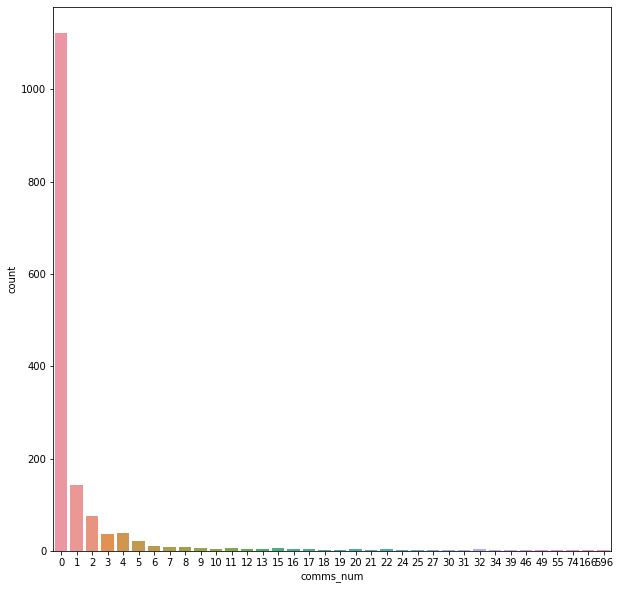

In [101]:
plt.figure(figsize = (10, 10))
sns.countplot(df['comms_num'])
